In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## Moment Generating Functions ##

The probability mass function and probability density, cdf, and survival functions are all ways of specifying the probability distribution of a random variable. They are all defined as probabilities or as probability per unit length, and thus have natural interpretations and visualizations.

But there are also more abstract ways of describing distributions. One that you have encountered is the probability generating function (pgf), which we defined for random variables with finitely many non-negative integer values.

We now define another such *transform* of a distribution. More general than the pgf, it is a powerful tool for studying distributions.

Let $X$ be a random variable. The *moment generating function* (mgf) of $X$ is a function defined on the real numbers by the formula

$$
M_X(t) ~ = ~ E(e^{tX}) 
$$

for all $t$ for which the expectation is finite. It is a fact (which we will not prove) that the domain of the mgf has to be an interval, not necessarily finite but necessarily including 0 because $M_X(0) = 1$.

For $X$ with finitely many non-negative integer values, we had defined the pgf by $G_X(s) = E(s^X)$. Notice that this is a special case of the mgf with $s = e^t$ and hence positive. For a random variable $X$ that has both a pgf $G_X$ and an mgf $M_X$, the two functions are related by $M_X(\log(s)) = G_X(s)$. Therefore the properties of $M_X$ near 0 reflect the properties of $G_X$ near 1.

```{admonition} Quick Check
The function $h(t) = 2t^2 - t + 5$ for $-\infty < t < \infty$ can't be the mgf of any random variable. How can we tell?

```

```{admonition} Answer
:class: dropdown
$h(0) \neq 1$

```

This section presents three ways in which the mgf is useful. Other ways are demonstrated in the subsequent sections of this chapter. Much of what we say about mgf's will not be accompanied by complete proofs as the math required is beyond the scope of this class. But the results should seem reasonable, even without formal proofs.

We will list the three ways first, and then use them all in examples.

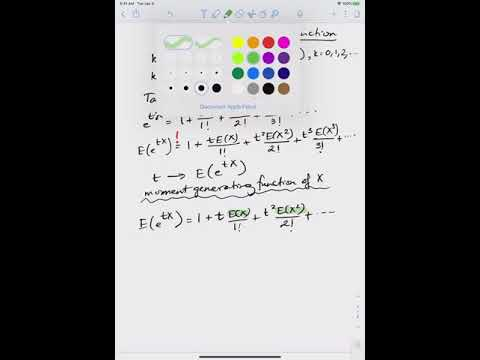

In [2]:
# VIDEO
from IPython.display import YouTubeVideo

YouTubeVideo('uljcfZRj7os')

### Generating Moments ###
For non-negative integers $k$, the expectation $E(X^k)$ is called *$k$th moment* of $X$. You saw in Data 8 and again in this course that the mean $E(X)$ is the center of gravity of the probability histogram of $X$. In physics, the center of mass is called the *first moment*. The terminology of moments is used in probability theory as well.

In this course we are only going to work with mgf's that are finite in some interval around 0. The interval could be the entire real line. It is a fact that if the mgf is finite around 0 (not just to one side of 0), then all the moments exist.

Expand $e^{tX}$ to see that

$$
\begin{align*}
M_X(t) ~ &= ~ E \big{(} 1 + t \frac{X}{1!} + t^2 \frac{X^2}{2!} + t^3 \frac{X^3}{3!} + \cdots \big{)} \\ \\
&= ~ 1 + t \frac{E(X)}{1!} + t^2 \frac{E(X^2)}{2!} + t^3 \frac{E(X^3)}{3!} + \cdots
\end{align*}
$$

by blithely switching the expectation and the infinite sum. This requires justification, which we won't go into.

Continue to set aside questions about whether we can switch infinite sums with other operations. Just go ahead and differentiate $M_X$ term by term. Let $M_X^{(n)}$ denote the $n$th derivative. Then

$$
M_X^{(1)} (t) ~ = ~ \frac{d}{dt} M_X(t) ~ = \frac{E(X)}{1!} + 2t \frac{E(X^2)}{2!} + 3t^2 \frac{E(X^3)}{3!} + \cdots
$$

and hence

$$
M^{(1)} (0) ~ = ~ E(X)
$$

Now differentiate $M_X^{(1)}$ to see that $M_X^{(2)}(0) = E(X^2)$, and, by induction,

$$
M^{(n)} (0) ~ = ~ E(X^n), ~~~~ n = 1, 2, 3, \ldots
$$

Hence we can *generate the moments of $X$* by evaluating successive derivatives of $M_X$ at $t=0$. This is one way in which mgf's are helpful.

### Identifying the Distribution ###
In this class we have made heavy use of the first and second moments, and no use at all of the higher moments. That will continue to be the case. But mgf's do involve all the moments, and this results in a property that is very useful for proving facts about distributions. 

**If two distributions have the same mgf, then they must be the same distribution.** This property is valid if the mgf exists in an interval around 0, which we assumed earlier in this section.

For example, if you recognize the mgf of a random variable as the mgf of a normal distribution, then the random variable must be normal.

By contrast, if you know the expectation of a random variable you can't identify the distribution of the random variable; even if you know both the mean and the SD (equivalently, the first and second moments), you can't identify the distribution. But if you know the moment generating function, and hence all the moments, then you can.

### Working Well with Sums ###
The third reason mgf's are useful is that like the pgf, the mgf of the sum of independent random variables is easily computed as a product.

Let $X$ and $Y$ be independent. Then

$$
M_{X+Y} (t) ~ = ~ E(e^{t(X+Y)}) ~ = ~ E(e^{tX} \cdot e^{tY})
$$

So if $X$ and $Y$ are independent,

$$
M_{X+Y}(t) ~ = ~ M_X(t) M_Y(t)
$$

It's time for some examples. Remember that the mgf of $X$ is the expectation of a function of $X$. In some cases we will calculate it using the non-linear function rule for expectations. In other cases we will use the multiplicative property of the mgf of the sum of independent random variables.

### MGFs of Some Discrete Random Variables ###

#### Bernoulli $(p)$ ####
$P(X = 1) = p$ and $P(X = 0) = 1 - p = q$. So

$$
M_X(t) ~ = ~ qe^{t \cdot 0} + pe^{t \cdot 1} ~ = ~ q + pe^t ~ = ~ 1 + p(e^t - 1)  ~~~ \text{for all } t 
$$

#### Binomial $(n, p)$ ####
A binomial random variable is the sum of $n$ i.i.d. indicators. So

$$
M_X(t) ~ = ~ (q + pe^t)^n ~~~ \text{for all } t 
$$

#### Poisson $(\mu)$ ####
This one is an exercise.

$$
M_X(t) ~ = ~ e^{\mu(e^t - 1)} ~~~ \text{for all } t
$$

You can also use this to show that the sum of independent Poisson variables is Poisson.

### MGF of a Gamma $(r, \lambda )$ Random Variable ###

Let $X$ have the gamma $(r, \lambda)$ distribution. Then

$$
\begin{align*}
M_X(t) ~ &= ~ \int_0^\infty e^{tx} \frac{\lambda^r}{\Gamma(r)} x^{r-1} e^{-\lambda x} dx \\ \\
&= ~ \frac{\lambda^r}{\Gamma(r)} \int_0^\infty x^{r-1} e^{-(\lambda - t)x} dx \\ \\
&= ~ \frac{\lambda^r}{\Gamma(r)} \cdot \frac{\Gamma(r)}{(\lambda - t)^r} ~~~~ t < \lambda \\ \\
&= \big{(} \frac{\lambda}{\lambda - t} \big{)}^r ~~~~ t < \lambda
\end{align*} 
$$

### Sums of Independent Gamma Variables with the Same Rate ###
If $X$ has gamma $(r, \lambda)$ distribution and $Y$ independent of $X$ has gamma $(s, \lambda)$ distribution, then

$$
\begin{align*} 
M_{X+Y} (t) ~ &= ~ \big{(} \frac{\lambda}{\lambda - t} \big{)}^r \cdot \big{(} \frac{\lambda}{\lambda - t} \big{)}^s ~~~~ t < \lambda \\ \\
&= ~ \big{(} \frac{\lambda}{\lambda - t} \big{)}^{r+s} ~~~~ t < \lambda
\end{align*}
$$

That's the mgf of the gamma $(r+s, \lambda)$ distribution. Because the mgf identifies the distribution, $X+Y$ must have the gamma $(r+s, \lambda)$ distribution.

This is what we observed in an earlier section by simulation, using numerical values of $r$ and $\lambda$.

```{admonition} Quick Check
The random variable $T$ has mgf $M_T(t) = \frac{8}{(2-t)^3}$, $t < 2$. What is the distribution of $T$?

```

```{admonition} Answer
:class: dropdown
gamma $(3, 2)$

```

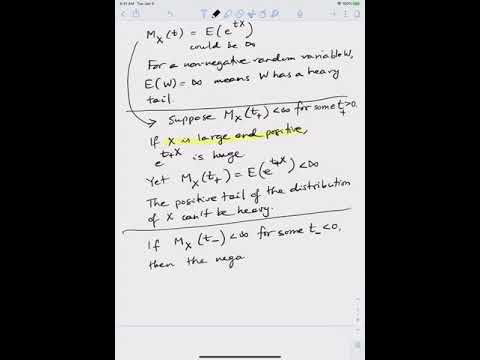

In [3]:
# VIDEO

YouTubeVideo('juRbr3EXnJg')

### Note on Existence ###
Let $X$ be a random variable. For all $t$, the random variable $e^{tX}$ is positive, so $M_X(t)$ is either positive or $+\infty$. 

The rough statements below should give you a sense of the connection between the tails of the distribution of $X$ and the existence of the mgf. We will not cover the proofs.

If $t > 0$ then $e^{tX}$ is large for large positive values of $X$. So if $M_X(t)$ is finite for a positive $t$, then the right hand tail of the distribution of $X$ can't be heavy.

If $t < 0$ then $e^{tX}$ is large for large negative values of $X$. So if $M_X(t)$ is finite for a negative $t$, then the left hand tail of the distribution of $X$ can't be heavy.

So if $M_X(t)$ is finite for a positive value of $t$ as well as for a negative value of $t$, then both of the tails aren't heavy.

It can be shown that if $M_X(t)$ is finite for some $t$, then $M_X(s)$ is finite for all $s$ between 0 and $t$. So $M_X(t)$ being finite for a positive $t$ as well as for a negative $t$ is equivalent to $M_X$ being finite on an interval around 0. The interval might be very small, but as long as it straddles 0 all the properties listed in this section hold.